First, we are going to simulate a random walk by creating an array and adding to each element the step-value or the negative of the step-value to get it's successor. The parameters of the function have been set to default with the values given in the question.

In [1]:
import numpy as np
import random
def generateRandomWalk(walk_size = 1000, step_size = 0.001, bias = 0.5):
  randomWalk = np.zeros(walk_size)
  for i in range(1,walk_size):
    if random.random() >= bias :
      randomWalk[i] = randomWalk[i-1] + step_size
    else : 
      randomWalk[i] = randomWalk[i-1] - step_size
  return randomWalk, randomWalk[-1]

This function then simulates 10,000 random walks and stores them and their terminal positions in it's two return value numpy arrays.

In [2]:
def generateSetOfWalks(sz = 10000):
  lastPositions = []
  entireWalks = []
  for i in range(sz):
    lastPositions.append(generateRandomWalk()[1])
    entireWalks.append(generateRandomWalk()[0])
  return np.array(lastPositions), np.array(entireWalks)

The following function is for plotting the histogram of the terminal positions. From theory, it's expected to be a normal distribution with mean 0 and variance 2Dt, where D is the diffusion constant given by ((dz)^2)/(2dt). In our case dz = 0.001, dt = 0.001 and t = 1000dt, so the variance is expected to be 0.001.

In [3]:
import matplotlib.pyplot as plt
def plotHistogram(np_lastPositions):
  _ = plt.hist(np_lastPositions, bins = 'auto')  
  plt.title("Histogram of the terminal positions of random walks")
  plt.show()

The following function plots a 1000 different random walks on a single graph. Choosing different colors for different walks is done by the matplotlib library itself. 

Note that we have also added thick black lines to denote the mean position, which is also the x-axis, and 2 "envelopes", which are basically the "3-sigma" bounds for the expected translation (which varies as the integral of the Gaussian PDF). One can confirm from the demonstration, visually, that indeed most of the random walk plots lie within the envelopes. The calculation of the envelopes also include some numerical factors such as sqrt(2/pi), which arise in the theoretical treatment of the problem.

In [8]:
import matplotlib.pyplot as plt
from math import *
def plotWalks(np_entireWalks, clip = 1000, step_size = 0.001):
  x_coord = np.arange(clip)
  fig, ax = plt.subplots()
  for i in np_entireWalks[:clip]:
    ax.plot(x_coord, i)
  ax.plot(x_coord, np.zeros(clip), color = 'black', linewidth = 2)
  upper = np.array(list(map(lambda x : 3*step_size*sqrt(2*x/np.pi), x_coord)))
  lower = np.array(list(map(lambda x : -3*step_size*sqrt(2*x/np.pi), x_coord)))
  ax.plot(x_coord, upper, color = 'black', linewidth = 2)
  ax.plot(x_coord, lower, color = 'black', linewidth = 2)
  plt.show()

This calculates the empirical mean of the terminal positions of the random walks. 

In [5]:
def empiricalMean(np_lastPositions):
  M_hat = np.mean(np_lastPositions, axis = None)
  print("The empirical mean of the last locations of the random walkers is", M_hat)
  print("The error between true mean and empirical mean is", M_hat*100, "%")
  return M_hat

This calculates the empirical variance of the terminal positions of the random walks. Since it calls the mean function from within itself, that's why one may see that in the demonstration below the mean function is not called to avoid duplication.

In [6]:
def empiricalVariance(np_lastPositions, walk_size = 1000, step_size = 0.001):
  M_hat = empiricalMean(np_lastPositions)
  V_hat = np.sum(np.array(list(map(lambda x : (x - M_hat)**2, np_lastPositions))), axis = None)/len(np_lastPositions)
  print("The empirical variance of the last locations of the random walkers is", V_hat)
  true_var = walk_size*(step_size**2)
  print("The error between true variance and empirical variance is", (V_hat - true_var)*100, "%")

Finally, we demonstrate below the functions developed above. One can see how beautifully the histogram resembles the Gaussian PDF. In the random walk plots, one can see the striking resemblance between the "envelope" of the plot and the square root function. Indeed, we again have from theory that the expected translation (absolute value of displacement) in a random walk grows as sqrt(N), where N is the number of steps taken so far, thus explaining the observation.

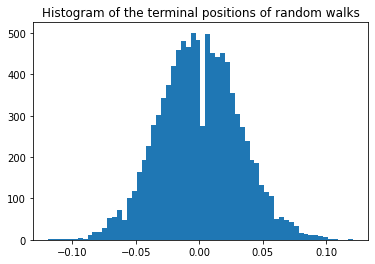

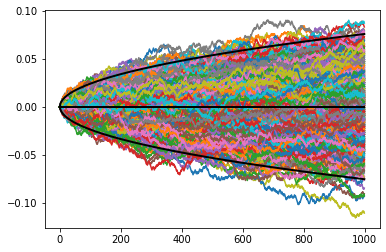

The empirical mean of the last locations of the random walkers is 8.200000000000003e-05
The error between true mean and empirical mean is 0.008200000000000002 %
The empirical variance of the last locations of the random walkers is 0.0010036332760000014
The error between true variance and empirical variance is 0.00036332760000013474 %


In [9]:
g = generateSetOfWalks()
plotHistogram(g[0])
plotWalks(g[1])
empiricalVariance(g[0])

References used for this code:

1. https://numpy.org/doc/stable/reference/generated/numpy.histogram.html